# Read Json

In [1]:
import pandas as pd
import json
import os

PROJ_DIR = '/Users/AAA/Parliament Analysis'
JSON_FILE = '2020-May-18Parsed result.json'

In [2]:
with open(os.path.join(PROJ_DIR, JSON_FILE)) as json_file:
    data = json.load(json_file)

# Parse data json into dataframe

In [3]:
attendance = pd.DataFrame()
parseKey = 'parsed'

# loop through each proceeding
for proceeding in data.keys():
    # create df from parsed
    a = pd.DataFrame.from_dict(data[proceeding][parseKey],orient = 'index')
    
    # add other information from proceeding
    for key in [x for x in data[proceeding].keys() if x != parseKey]:
        a[key] = data[proceeding][key]
    
    # add back to attendance df
    attendance = pd.concat([attendance, a], sort = False).reset_index(drop = True)

# Clean attenance

#### Extract name

In [4]:
regCol = 'regexInterim'
memberCol = 'members'
areaCol = 'area'
rawCol = 'raw'

attendance[rawCol] = attendance[rawCol].str.replace('[^\x00-\x7F]+','')
attendance[regCol] = attendance[rawCol].str.extract('(?:Mrs|Prof\.{0,1}|Dr|Ms|Miss|Madam|Mdm|Mr|Encik)\s*(.*\(.*\))')
attendance[regCol] = attendance[regCol].str.replace('SPEAKER \(',"")
attendance[areaCol] = attendance[regCol].str.extract('(\(.*\))')
attendance[areaCol] = attendance[areaCol].str.replace('\(|\)',"")
attendance[areaCol] = attendance[areaCol].str.strip()

attendance[memberCol] = attendance[regCol].str.extract('(.*)\(')
attendance[memberCol] = attendance[memberCol].str.replace('Mrs|Prof\.{0,1}|Dr|Ms|Miss|Madam|Mdm|Mr|Encik','')
attendance[memberCol] = attendance[memberCol].str.replace('[-|\.]',' ')
attendance[memberCol] = attendance[memberCol].str.strip()

##### Extract proceeding number

In [5]:
numCol = 'num'
numNewCol = 'proceedingNum'
attendance[numNewCol] = attendance[numCol].str.extract('([0-9]+)')
attendance[numNewCol] = attendance[numNewCol].astype('int64')

#### Extract sitting date

In [6]:
dateRawCol = 'sittingDate'
dateNewCol = 'sittingDt'

attendance[dateNewCol] = attendance[dateRawCol].str.replace('Sitting on',"")
attendance[dateNewCol] = pd.to_datetime(attendance[dateNewCol])

# <font color = 'red'>Remove false results</font>
<font color = 'red'>Manually</font> look through raw data to verify

###### Those without names detected

In [7]:
attendance.shape

(40703, 11)

In [8]:
pd.options.display.max_rows = 1000
display(attendance.loc[attendance[regCol].isna(),'raw'])
pd.options.display.max_rows = 10

503      by the Second Minister for Finance (Mr Lawrenc...
504             be reduced by $100.".  (Mr Sitoh Yih Pin).
505               be reduced by $100.".  (Dr Chia Shi-Lu).
506      be reduced by $100.".  (Mr Seah Kian Peng); De...
507      4 Extension of Sitting  Pursuant to Standing O...
508      Estimates be reduced by $100.".  (Mr Seah Kian...
509      With the consent of Mr Speaker, Motion made, a...
510      Mr Speaker will take the Chair again at 10.00 ...
811      be reduced by $100.".  (Mr Christopher de Souza).
812               be reduced by $100.".  (Mr Vikram Nair).
813               be reduced by $100.".  (Mr Vikram Nair).
814      be reduced by $100.".  (Mr Liang Eng Hwa); Deb...
816      Mr Speaker will take the Chair again at 10.00 ...
1017     1 Announcement by Speaker  Mr Speaker made the...
2919             be reduced by $100.".  (Dr Lim Wee Kiak).
2920     3 Supply Bill  (Second Minister for Finance (M...
2921     4 Supplementary Supply (FY 2018) Bill  (Second.

In [9]:
attendance = attendance.loc[attendance[regCol].isna() == False]
attendance.shape

(40282, 11)

#### Those with names detected but are actually wrong

In [10]:
areas = list(attendance[areaCol].unique())
areas.sort(key = len)

In [11]:
correct_area = [
    'Yuhua','Yuh ua','Jurong', 'Pioneer','Hougang','Whampoa','Tampines','Nee Soon',
    'Aljunied','Fengshan','Hong Kah','Sembawang','Sembawan g','Sem bawang','Radin Mas','Joo Chiat',
    ' Joo Chiat','Ang Mo Kio','West Coast','East Coast','MacPherson','Ayer Rajah',
    'Jalan Besar','Mountbatten','Bukit Batok','Bukit Timah','Punggol East','Bishan-Toa Payoh','BishanToa Payoh',
    'Potong Pasir','Yio Chu Kang','Marine Parade','Tanjong Pagar','Chua Chu Kang','Potong Pasir',
    'Sengkang West','Bukit Panjang','Nee Soon East','Hong Kah North','MoulmeinKallang',
    'Moulmein-Kallang','Mo ulmein-Kallang','Nee Soon Central','Pasir Ris-Punggol','Pasir RisPunggol','Marsiling-Yew Tee',
    'Bishan- Toa Payoh','Pasir Ris- Punggol','Holland-Bukit Timah','HollandBukit Timah','Holland-Bukit Panjang',
    'Holland- Bukit Panjang','Holland-Bukit T imah','Nominated Member','NonConstituency Member',
    'Non–Constituency Member','Non-Constituency Member','Nominated Member of Parliament'
]

###### Double check correct areas

In [12]:
wrong_area = attendance.loc[attendance[areaCol].isin(correct_area) == False,areaCol].unique()
wrong_area = list(wrong_area)
wrong_area.sort(key = len)
wrong_area

['Amendment',
 'Admission',
 'Revocation',
 'Amendment No. 2',
 'Amendment No. 3',
 'Mr Charles Chong',
 '4th Allotted Day',
 '3rd Allotted Day',
 '2nd Allotted Day',
 '1st Allotted Day',
 'Mr Lim Biow Chuan',
 'Unclaimed Money Fund',
 'Professional Conduct',
 'Law Practice Entities',
 'Regulated Individuals',
 'Confiscation of Benefits',
 'Group Practice Amendment',
 'Prescribed Fees Amendment',
 'Deposit Interest Amendment',
 'Law Corporation Revocation',
 'Qualified Persons Amendment',
 'Accountants Report Amendment',
 'Solicitors Accounts Amendment',
 'Professional Conduct Amendment',
 'Trade Effluent Amendment No. 2',
 'Disciplinary Tribunal Amendment',
 'Legal Practice Management Course',
 'International Services Amendment',
 'International Services Revocation',
 'Qualified Persons Amendment No. 2',
 'Amendment Act 2014 Commencement No. 2',
 'Professional Indemnity Insurance Amendment',
 'Foreign Practitioner Examinations Amendment',
 'Legal Practice Management Course Revocation'

In [13]:
attendance = attendance.loc[attendance[areaCol].isin(correct_area)]
attendance.shape

(39946, 11)

# Verify data - Outliers

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

statusCol = 'status'
total_members = attendance.groupby(['parliament',dateNewCol,numNewCol], as_index = False)[statusCol].count()
total_members = total_members.rename(columns = {statusCol: 'Cnt'}).sort_values('parliament')
g = sns.FacetGrid(total_members, row="parliament", sharex = False, sharey = False, aspect  = 4)
g.map(sns.lineplot, dateNewCol, 'Cnt')
g

### Find outliers

#### 10th parliament - Sitting Date 2005-05-16 - Proceeding 22
Manually verified to be correct

In [15]:
total_members[(total_members.parliament.str.contains('10th')) &
              (total_members.Cnt >= 95)]

,parliament,sittingDt,proceedingNum,Cnt
21,10th Parliament,2005-05-16,22,97


##### 11th parliament - Sitting Date 2007-09-19 - Proceeding 32
Manually verified to be correct

In [16]:
total_members[(total_members.parliament.str.contains('11th')) &
              (total_members.Cnt >= 93) & (total_members.sittingDt >= '2007-08-20')]

,parliament,sittingDt,proceedingNum,Cnt
77,11th Parliament,2007-09-19,32,93


##### 12th parliament
Manually verified. Proceeding 12 and 35 should be 99 and 98 respectively. 
<br/>Proceeding 12 mismatch due to inclusion of Nominated Member of Parliament where the regex is in similar format
<br/>Proceeding 35 mismatch due to inclusion of miniteres who made tribute to late Mr Lee

In [17]:
total_members[(total_members.parliament.str.contains('12th')) &
              (total_members.Cnt >= 100) ]

,parliament,sittingDt,proceedingNum,Cnt
252,12th Parliament,2014-05-28,4,100


In [18]:
total_members[(total_members.parliament.str.contains('12th')) &
              (total_members.Cnt > 97) & (total_members.sittingDt <= '2012-05-01')]

,parliament,sittingDt,proceedingNum,Cnt
185,12th Parliament,2012-02-14,13,98


# Verify data - Duplicates

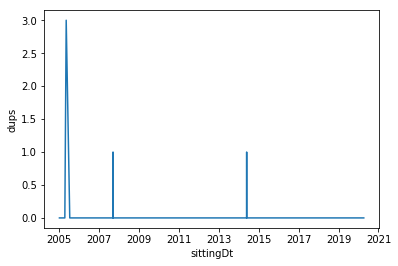

In [19]:
def count_duplicates(df):
    """Count number of duplicated members"""
    dups = df.groupby('members', as_index = False)['status'].count()
    dups = dups.loc[dups.status > 1]
    return(len(dups))
duplicateCnt = attendance.groupby(['sittingDt','parliament','proceedingNum']).apply(count_duplicates).reset_index()
duplicateCnt = duplicateCnt.rename(columns = {0: 'dups'})
sns.lineplot(x = 'sittingDt', y = 'dups', data = duplicateCnt)

In [20]:
duplicateCnt[duplicateCnt.dups > 0]

,sittingDt,parliament,proceedingNum,dups
21,2005-05-16,10th Parliament,22,3
77,2007-09-19,11th Parliament,32,1
252,2014-05-28,12th Parliament,4,1


In [21]:
dups = attendance.loc[(attendance.sittingDt.isin(['2005-05-16','2007-09-19','2014-05-28'])) &
                     (attendance.proceedingNum.isin([22,32,4]))]
cols = ['sittingDt','parliament','proceedingNum','members']
dupsAgg = dups.groupby(cols,as_index = False)['raw'].count()
dupsAgg = dupsAgg.rename(columns = {'raw':'Cnt'})
dupsAgg = dupsAgg.loc[dupsAgg.Cnt > 1]
dupsStatus = dupsAgg.merge(attendance[cols + ['status']])
dupsStatus

,sittingDt,parliament,proceedingNum,members,Cnt,status
0,2005-05-16,10th Parliament,22,MOHAMAD MALIKI BIN OSMAN,2,True
1,2005-05-16,10th Parliament,22,MOHAMAD MALIKI BIN OSMAN,2,False
2,2005-05-16,10th Parliament,22,WANG KAI YUEN,2,True
3,2005-05-16,10th Parliament,22,WANG KAI YUEN,2,False
4,2005-05-16,10th Parliament,22,ZAINUL ABIDIN RASHEED,2,True
5,2005-05-16,10th Parliament,22,ZAINUL ABIDIN RASHEED,2,False
6,2007-09-19,11th Parliament,32,YU FOO YEE SHOON,2,False
7,2007-09-19,11th Parliament,32,YU FOO YEE SHOON,2,False
8,2014-05-28,12th Parliament,4,MARY LIEW,2,False
9,2014-05-28,12th Parliament,4,MARY LIEW,2,False


1. For proceeding 22, there are 3 duplicates where the members appear in both present and absent. This is confirmed by a manual check. We assume they are present and remove absent entries
2. For proceeding 32 and 4, there are 2 duplicates. This is confirmed by manual check. We removed duplicates

In [22]:
toRemove = attendance.loc[(attendance.proceedingNum == 22) &
                          (attendance.sittingDt == '2005-05-16') &
                          (attendance.members.isin(['ZAINUL ABIDIN RASHEED','WANG KAI YUEN','MOHAMAD MALIKI BIN OSMAN'])) &
                          (attendance.status == False)
                    ].index.tolist()
toRemove2 = attendance.loc[(attendance.proceedingNum == 32) &
                           (attendance.members == 'YU-FOO YEE SHOON') &
                           (attendance.status == False)].index.tolist()
toRemove3 = attendance.loc[(attendance.proceedingNum == 4) &
                           (attendance.members == 'MARY LIEW') &
                           (attendance.status == False)].index.tolist()
attendance = attendance.drop(toRemove + toRemove2 + toRemove3)

# Verify data - Areas

In [23]:
areas = attendance.area.unique()
areas.sort()
areas

array(['Aljunied', 'Ang Mo Kio', 'Ayer Rajah', 'Bishan- Toa Payoh',
       'Bishan-Toa Payoh', 'BishanToa Payoh', 'Bukit Batok',
       'Bukit Panjang', 'Bukit Timah', 'Chua Chu Kang', 'East Coast',
       'Fengshan', 'Holland- Bukit Panjang', 'Holland-Bukit Panjang',
       'Holland-Bukit T imah', 'Holland-Bukit Timah',
       'HollandBukit Timah', 'Hong Kah', 'Hong Kah North', 'Hougang',
       'Jalan Besar', 'Joo Chiat', 'Jurong', 'MacPherson',
       'Marine Parade', 'Marsiling-Yew Tee', 'Mo ulmein-Kallang',
       'Moulmein-Kallang', 'MoulmeinKallang', 'Mountbatten', 'Nee Soon',
       'Nee Soon Central', 'Nee Soon East', 'Nominated Member',
       'Non-Constituency Member', 'NonConstituency Member',
       'Pasir Ris- Punggol', 'Pasir Ris-Punggol', 'Pasir RisPunggol',
       'Pioneer', 'Potong Pasir', 'Punggol East', 'Radin Mas',
       'Sem bawang', 'Sembawan g', 'Sembawang', 'Sengkang West',
       'Tampines', 'Tanjong Pagar', 'West Coast', 'Whampoa',
       'Yio Chu Kang', 'Yu

In [24]:
mapping = {
    'Bishan- Toa Payoh': 'Bishan-Toa Payoh',
    'BishanToa Payoh': 'Bishan-Toa Payoh',
    'Holland- Bukit Panjang': 'Holland-Bukit Panjang',
    'Holland-Bukit T imah': 'Holland-Bukit Timah',
    'HollandBukit Timah': 'Holland-Bukit Timah',
    'Mo ulmein-Kallang': 'Moulmein-Kallang',
    'MoulmeinKallang': 'Moulmein-Kallang',
    'NonConstituency Member': 'Non-Constituency Member',
    'Pasir Ris- Punggol': 'Pasir Ris-Punggol',
    'Pasir RisPunggol': 'Pasir Ris-Punggol',
    'Sem bawang': 'Sembawang',
    'Sembawan g': 'Sembawang',
    'Yuh ua': 'Yuhua'
}

for wrong, correct in mapping.items():
    attendance.loc[attendance.area == wrong, 'area'] = correct

# Verify data - Members

In [25]:
attendance['members'] = attendance.members.str.title()
mList = attendance.members.unique()
mList.sort()

##### Use  Levenstein's distance to determine most similar name

In [32]:
def get_similar_names(attendance):
    """Return df of members with similar names"""
    members = pd.DataFrame(data = {'members':attendance.members.drop_duplicates()})
    def get_top_score(row, memberList):
        """Calculate levenstein score and return name with highest score"""
        import nltk
        nme = row.members
        curScore = 1000000
        curNme = ""

        for m in memberList:
            if m != nme:
                tempScore = nltk.edit_distance(nme, m)
                if tempScore < curScore:
                    curScore = tempScore
                    curNme = m
        return([curScore, curNme])
    
    def sort_partner(row):
        """Sort alphabetically and concat"""
        names = [row.members, row.similar]
        names.sort()
        return(','.join(names))
    
    members[['score','similar']] = members.apply(get_top_score, memberList = mList, axis = 1, result_type = 'expand')
    members['pair'] = members.apply(sort_partner, axis = 1)
    members = members.drop_duplicates(subset = 'pair')
    members = members.sort_values('score')
    return(members)

In [33]:
pd.options.display.max_rows = 229
members = get_similar_names(attendance)
members

,members,score,similar,pair
0,Tan Chuan Jin,2,Tan Chuanjin,"Tan Chuan Jin,Tan Chuanjin"
2,Chia Shi Lu,2,Chia Shilu,"Chia Shi Lu,Chia Shilu"
24884,Ong Ah Heng,3,Ong Seh Hong,"Ong Ah Heng,Ong Seh Hong"
26,Khaw Boon Wan,3,Tan Boon Wan,"Khaw Boon Wan,Tan Boon Wan"
21318,Mr Michael Palmer,3,Michael Palmer,"Michael Palmer,Mr Michael Palmer"
24836,Mr Abdullah Tarmugi,3,Abdullah Tarmugi,"Abdullah Tarmugi,Mr Abdullah Tarmugi"
35,Lee Yi Shyan,4,Lee Li Lian,"Lee Li Lian,Lee Yi Shyan"
44,Masagos Zulkifli B M M,4,Masagos Zulkifli Bmm,"Masagos Zulkifli B M M,Masagos Zulkifli Bmm"
13250,Ellen Lee,4,Warren Lee,"Ellen Lee,Warren Lee"
8184,Halimah Yacob,4,Mdm Halimah Yacob,"Halimah Yacob,Mdm Halimah Yacob"


In [35]:
mapping = {
    'Tan Chuanjin': 'Tan Chuan Jin',
    'Chia Shilu': 'Chia Shi Lu',
    'Mr Abdullah Tarmugi': 'Abdullah Tarmugi',
    'Mr Michael Palmer': 'Michael Palmer',
    'Masagos Zulkifli B M M': 'Masagos Zulkifli Bmm',
    'Mdm Halimah Yacob': 'Halimah Yacob',
    'Desmond Lee': 'Desmond Lee Ti Seng',
    'Hri Kumar Nair': 'Hri Kumar',
}

for wrong, correct in mapping.items():
    attendance.loc[attendance.members == wrong, 'members'] = correct

# Write to output

In [45]:
import os
from datetime import datetime
saveDir = '/Users/AAA/Parliament Analysis'
wbName = 'Attendance '+ datetime.now().strftime('%Y-%m-%d') + '.xlsx'

toSave = attendance.drop(['raw','regexInterim'], axis = 1)
fullPath = os.path.join(saveDir,wbName)
toSave.to_excel(fullPath,index = False)